# This notebook is customized for the estimated_rent feature. Because we would like to use quartiles instead of median to distingush high and low rent area.

In [1]:
import numpy as np
import pandas as pd
import datetime
import geopandas as gpd
pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.float_format = '{:.5f}'.format
import warnings
warnings.filterwarnings("ignore")
# %pip install contextily

import matplotlib.colors as mcolors
from shapely.geometry import Point
from geopandas import GeoDataFrame

/home/rongxiang/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
%%time
df_shap = pd.read_csv("./output/food_localness_final_oct_new_shap_values.csv", sep=",", header=0)
df_shap = df_shap.drop(columns=['account_id','customer_lon','customer_lat','vendor_id','vendor_lon','vendor_lat'])
print(df_shap.shape[0])
df_shap.head()

2778722
CPU times: user 17.5 s, sys: 3.22 s, total: 20.7 s
Wall time: 23.9 s


,order_id,shap_customer_lon,shap_customer_lat,shap_basket_amount_lc,shap_price_per_item,shap_order_time_hour,shap_total_duration,shap_estimated_rent,shap_entropy_0.5km,shap_entropy_2km,shap_entropy_5km,shap_incentive_amount_lc,shap_incentive_delivery,shap_incentive_menu_discount,shap_incentive_voucher_wallet,shap_consistency,shap_delivery_fee_amount_lc,shap_main_cuisine,shap_total_orders,shap_rating,shap_n_rating,shap_isweekend,shap_restaurant_count_0.5km,shap_restaurant_count_0.5_1km,shap_restaurant_count_1_2km,shap_restaurant_count_2_3km,shap_restaurant_count_3_4km,shap_restaurant_count_4_5km
0,1304769890,-0.02001,-0.01686,0.00286,-0.02344,-0.00787,-0.01087,0.01402,-0.04546,-0.01858,0.00625,0.01216,0.00848,-0.00008,-0.00070,-0.00390,-0.12115,0.02295,-0.00405,0.00059,0.00404,-0.00208,-0.03179,-0.02338,-0.01309,0.01061,0.02541,0.00883
1,1304769334,-0.02371,-0.01162,0.00161,-0.02036,-0.01088,-0.00959,0.01303,-0.02078,-0.00839,0.00440,0.00838,0.00941,-0.00651,-0.00084,-0.00164,-0.12400,0.02345,0.00293,-0.00663,-0.00158,0.00101,-0.03968,-0.03642,-0.01071,0.01071,0.02760,0.00582
2,1306219965,-0.01736,-0.04002,0.00204,-0.00857,-0.00048,0.00607,0.00402,-0.04500,-0.01369,-0.00544,-0.01021,0.00348,-0.00786,-0.00260,-0.00054,0.01120,0.03195,-0.00172,0.00124,0.01794,-0.00049,-0.06548,-0.01417,-0.01092,0.00078,0.01011,-0.00628
3,1295994041,-0.01674,-0.04614,0.00445,-0.00547,-0.00390,0.03924,0.00334,-0.04449,-0.01331,-0.00697,-0.00886,0.00316,-0.00792,-0.00228,-0.00109,0.02295,0.03069,-0.00229,-0.00155,0.02368,-0.00020,-0.06275,-0.01473,-0.01089,0.00022,0.01141,-0.00829
4,1304742536,-0.00542,-0.03611,-0.00138,-0.02105,-0.02472,-0.02454,-0.01087,-0.06368,-0.02259,-0.01490,-0.04545,-0.14190,0.01682,-0.00053,0.00302,0.15575,0.01069,-0.00318,-0.01963,-0.03092,0.00062,-0.06862,-0.00769,-0.00645,-0.01258,0.00209,-0.01594


In [8]:
df_localness = pd.read_csv('./data/food_localness_final_oct_new.csv')
print(df_localness.shape[0])

2778722


In [9]:
df_shap_merged = df_localness.merge(df_shap, on='order_id')
print(df_shap_merged.shape[0])

2778722


# Hexagon

<Axes: >

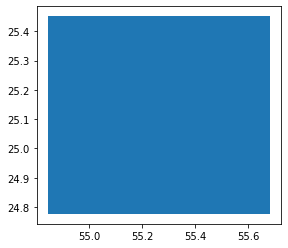

In [10]:
from shapely.geometry import box

bound_lat = [24.776468,25.451666]
bound_lon = [54.842954,55.680861] # 25.637066, 55.849584 

dubai_box = gpd.GeoDataFrame(geometry=[box(bound_lon[0],bound_lat[0],bound_lon[1],bound_lat[1])],crs="EPSG:4326")
dubai_box.plot()

CPU times: user 1.64 s, sys: 76.1 ms, total: 1.72 s
Wall time: 1.99 s


,index,geometry
h3_polyfill,,
8843a10e63fffff,0,"POLYGON ((54.96291 24.87871, 54.96468 24.87444, 54.96976 24.87333, 54.97307 24.87648, 54.97130 24.88075, 54.96622 24.88186, 54.96291 24.87871))"
8843acc505fffff,0,"POLYGON ((55.47310 25.39806, 55.47486 25.39376, 55.47999 25.39262, 55.48336 25.39580, 55.48160 25.40011, 55.47647 25.40124, 55.47310 25.39806))"
8843a10021fffff,0,"POLYGON ((54.87000 24.89130, 54.87178 24.88704, 54.87685 24.88593, 54.88015 24.88908, 54.87838 24.89335, 54.87330 24.89446, 54.87000 24.89130))"
8843ac514bfffff,0,"POLYGON ((55.50514 25.13661, 55.50689 25.13232, 55.51199 25.13118, 55.51535 25.13434, 55.51361 25.13864, 55.50850 25.13977, 55.50514 25.13661))"
8843a12c9bfffff,0,"POLYGON ((55.51202 24.98289, 55.51376 24.97861, 55.51886 24.97747, 55.52221 24.98062, 55.52046 24.98491, 55.51537 24.98604, 55.51202 24.98289))"


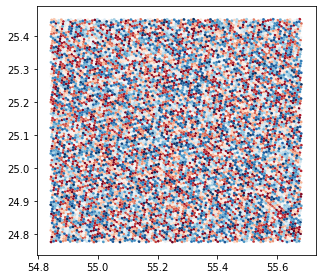

In [11]:
%%time
# %pip install h3pandas
# create hexagon within the UAE border
import geopandas as gpd
import h3pandas

resolution = 8 # Average edge length: 500m
hexagons = dubai_box.h3.polyfill_resample(resolution)
ax = hexagons.plot(figsize=(5, 5), cmap='RdBu')
hexagons.head()

In [12]:
%%time
selected_feature = 'estimated_rent'
# Some continuous features to be considered: incentive_amount_lc, entropy_0.5km, restaurant_count_0.5km, estimated_rent, price_per_item, incentive_delivery

df_onefeature = df_shap_merged[['account_id','order_id','customer_lon','customer_lat', selected_feature,'shap_'+selected_feature]]
geometry2 = [Point(xy) for xy in zip(df_onefeature.customer_lon, df_onefeature.customer_lat)]
gdf_onefeature = GeoDataFrame(df_onefeature, crs="EPSG:4326", geometry=geometry2)
# gdf_test = gdf_onefeature.head(1000)
# gdf_test.head()

CPU times: user 14.9 s, sys: 2.02 ms, total: 15 s
Wall time: 14.9 s


In [13]:
%%time
mean_hex = gpd.sjoin(gdf_onefeature, hexagons, op='within') 
hexagon_agg = mean_hex[['index_right',selected_feature,'shap_'+selected_feature]].groupby('index_right').agg('mean')
hexagon_agg_ordernumber = hexagons.merge(hexagon_agg,left_index=True,right_index=True) # focus on hexagons that contains delivery data
print(hexagon_agg_ordernumber.shape[0])
hexagon_agg_ordernumber.head()

1351
CPU times: user 4.25 s, sys: 277 ms, total: 4.52 s
Wall time: 4.52 s


,index,geometry,estimated_rent,shap_estimated_rent
8843a12001fffff,0,"POLYGON ((55.27802 25.01141, 55.27977 25.00713, 55.28486 25.00600, 55.28820 25.00916, 55.28644 25.01344, 55.28135 25.01457, 55.27802 25.01141))",79.19807,-0.00305
8843acca6dfffff,0,"POLYGON ((55.30653 25.25867, 55.30830 25.25437, 55.31341 25.25325, 55.31676 25.25642, 55.31500 25.26071, 55.30988 25.26184, 55.30653 25.25867))",72.26300,0.00206
8843a1308bfffff,0,"POLYGON ((55.18361 25.09454, 55.18537 25.09025, 55.19047 25.08913, 55.19380 25.09229, 55.19204 25.09658, 55.18694 25.09770, 55.18361 25.09454))",65.61759,-0.00587
8843acd995fffff,0,"POLYGON ((55.29120 25.26205, 55.29296 25.25775, 55.29807 25.25662, 55.30142 25.25979, 55.29966 25.26409, 55.29455 25.26522, 55.29120 25.26205))",63.74219,-0.00295
8843acc985fffff,0,"POLYGON ((55.42809 25.18885, 55.42984 25.18455, 55.43495 25.18342, 55.43831 25.18659, 55.43655 25.19088, 55.43144 25.19201, 55.42809 25.18885))",33.87154,0.00877


# Spatial analysis of SHAP option 1 - 4 quartiles times two SHAP categories = 8 quadrants

interactive plots are cool but takes a very long time to show millions of points

In [14]:
gdf = hexagon_agg_ordernumber.copy()
gdf['estimated_rent_quantile'] = pd.qcut(gdf.estimated_rent, 4, labels=["Quartile_1", "Quartile_2", "Quartile_3", "Quartile_4"])
gdf.loc[gdf['shap_estimated_rent']>0,'shap_estimated_rent_group'] = 'Positive'
gdf.loc[gdf['shap_estimated_rent']<=0,'shap_estimated_rent_group'] = 'Negative'
gdf['quadrant_new'] = gdf['estimated_rent_quantile'].astype(str) + '-' + gdf['shap_estimated_rent_group'].astype(str)
print(gdf.quadrant_new.value_counts())
print(gdf.groupby(['estimated_rent_quantile']).estimated_rent.mean())

quadrant_new
Quartile_2-Negative    301
Quartile_4-Positive    291
Quartile_3-Negative    194
Quartile_1-Negative    186
Quartile_1-Positive    153
Quartile_3-Positive    143
Quartile_4-Negative    47 
Quartile_2-Positive    36 
Name: count, dtype: int64
estimated_rent_quantile
Quartile_1   36.99702 
Quartile_2   57.58950 
Quartile_3   75.67909 
Quartile_4   138.06481
Name: estimated_rent, dtype: float64


In [15]:
gdf_need = gdf[gdf['quadrant_new'].isin(['Quartile_4-Negative','Quartile_4-Positive',
                                         'Quartile_1-Negative','Quartile_1-Positive'])]

In [16]:
gdf_need.loc[gdf_need.quadrant_new == 'Quartile_4-Negative', 'quadrant_new'] = 'High-Negative'
gdf_need.loc[gdf_need.quadrant_new == 'Quartile_4-Positive', 'quadrant_new'] = 'High-Positive'
gdf_need.loc[gdf_need.quadrant_new == 'Quartile_1-Negative', 'quadrant_new'] = 'Low-Negative'
gdf_need.loc[gdf_need.quadrant_new == 'Quartile_1-Positive', 'quadrant_new'] = 'Low-Positive'

estimated_rent


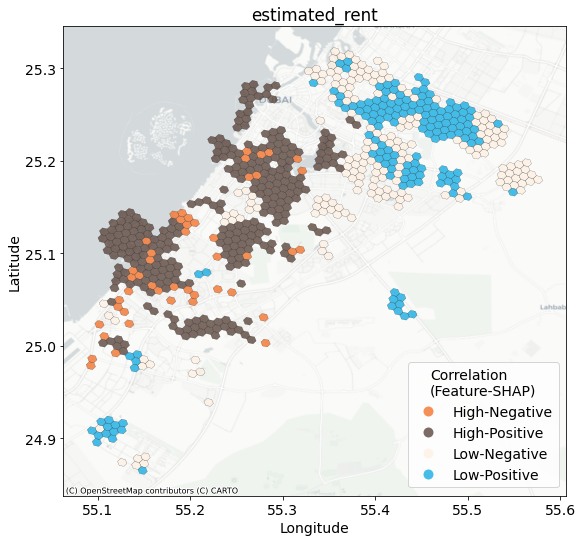

CPU times: user 2.75 s, sys: 377 ms, total: 3.13 s
Wall time: 5.56 s


In [17]:
%%time
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(9, 9))
print(selected_feature)

# colorlist = ['#5c473e', '#f3742e', '#ab6037', '#18aee5','#fef2e5','#97d0e8','#417b8f','#fab186','#b0988c']
# colorlist = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
# colorlist = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fdbf6f", "#ff7f00", "#fb9a99", "#e31a1c"]
# High-Negative, High-Positive, Low-Negative, Low-Positive
colorlist = ['#f3742e','#5c473e', '#fef1e4','#18aee5']
cmap = mcolors.ListedColormap(colorlist)

gdf_need.plot(
    column='quadrant_new',         # Categorical column
    cmap=cmap,               # Colormap for categories
    alpha=0.8,
    legend=True,               # Show legend for categories
    categorical=True,          # Specify that the column is categorical
#     markersize= gdf_onefeature[selected_feature]/5,
    edgecolor = 'black',
    linewidth=0.2,
    ax=ax
)

leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.45,0.46))
leg.set_bbox_to_anchor((1,0.3))
leg.set_title('Correlation\n(Feature-SHAP)')
cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(selected_feature)
plt.savefig('./output/hex_spatial_SHAP_'+selected_feature+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# %%time

# color_list = ['#5c473e', '#f3742e', '#ab6037', '#18aee5','#fef2e5','#97d0e8','#417b8f','#fab186','#b0988c']

# gdf.head(10000).explore(
#     column='quadrant',  # make choropleth based on "BoroName" column
#     popup=True,  # show all values in popup (on click)
#     tiles="CartoDB positron",  # use "CartoDB positron" tiles #OpenStreetMap
# #     cmap="rainbow",  # use "Set1" matplotlib colormap
#     cmap=color_list,
#     style_kwds=dict(color="gray",weight='0.1',fillOpacity=0.6)
# )

# # This map overall is information dense and could be difficult to interpret because points are too dense

In [21]:
# gdf_need.explore(
#     column='quadrant_new',
#     cmap=cmap,
# )